In [1]:
# Packages

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed
seed = 256
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
# Variables
input_size = 28 * 28
hid_1 = 28 * 4
output_size = 10
Epochs = 15
batch_size = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
# Normalize data with mean = 0.5, std = 1.0
Transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0))
])

In [5]:
# Download Mnist dataset
path = './dataset'
train_data = MNIST(path, transform=Transforms, train=True, download=True)
test_data = MNIST(path, transform=Transforms, train=False, download=True)

60000
10000
torch.Size([28, 28])
5


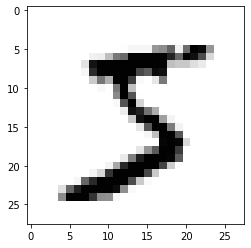

In [6]:
# Check the MNIST data
print(len(train_data))
print(len(test_data))

temp_data = train_data.data[0]
temp_label = train_data.targets[0].item()

plt.imshow(temp_data.view(28, 28), cmap='Greys', interpolation='nearest')
print(temp_data.shape)
print(temp_label)

In [7]:
# Batch
train_iterator = DataLoader(dataset = train_data,
                            batch_size = batch_size,
                            shuffle = True,
                            drop_last = True)

In [8]:
# Model
linear1 = nn.Linear(input_size, hid_1, bias = True)
linear2 = nn.Linear(hid_1, output_size, bias = True)

model = nn.Sequential(linear1, nn.ReLU(), linear2).to(device)

In [9]:
# Criterion, optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [10]:
# Train model

for epoch in range(Epochs):
    
    avg_cost = 0
    total_batch = len(train_iterator)
    model.train()
    
    for X, y in train_iterator:
        X = X.view(-1, input_size).to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.437891275
Epoch: 0002 cost = 0.239951164
Epoch: 0003 cost = 0.172806293
Epoch: 0004 cost = 0.137031689
Epoch: 0005 cost = 0.114373721
Epoch: 0006 cost = 0.097971417
Epoch: 0007 cost = 0.087448575
Epoch: 0008 cost = 0.077542007
Epoch: 0009 cost = 0.073330358
Epoch: 0010 cost = 0.064646557
Epoch: 0011 cost = 0.060484178
Epoch: 0012 cost = 0.056417041
Epoch: 0013 cost = 0.052947879
Epoch: 0014 cost = 0.050034516
Epoch: 0015 cost = 0.044890270


Test Accuracy: 0.905399978
Label:  8
Prediction:  8
Single output:
tensor([[ -693.4775, -2403.5049,   672.9318,   234.8072, -6869.8223, -3371.7263,
         -5444.3975, -2714.3857,  1443.2938, -1392.8663]], device='cuda:0')


/home/wjlee/anaconda3/envs/glove/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/wjlee/anaconda3/envs/glove/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


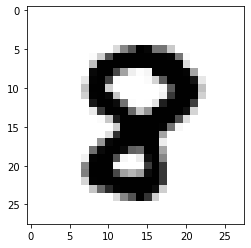

In [11]:
# Test

model.eval()
with torch.no_grad():
    X = test_data.test_data.view(-1, input_size).float().to(device)
    y = test_data.test_labels.to(device)
    
    output = model(X)
    correct = torch.argmax(output, 1) == y
    acc = correct.float().mean().item()
    print("Test Accuracy: {:.9f}".format(acc))
    
    # plot ref: https://m.blog.naver.com/PostView.nhn?blogId=hongjg3229&logNo=221560700128&proxyReferer=https:%2F%2Fwww.google.com%2F
    # Get one and predict
    r = random.randint(0, len(test_data) - 1)
    X_single_data = test_data.test_data[r].view(-1, input_size).float().to(device)
    Y_single_data = test_data.test_labels[r].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    # check single output
    print("Single output:")
    print(single_prediction)

    plt.imshow(test_data.test_data[r].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()